In [1]:
# import package
import pandas as pd
#import math
import numpy as np
import statsmodels.api as sm
#from scipy import stats
#import statistics
#import plotly.graph_objects as go
#from scipy.stats import norm
#from plotly.subplots import make_subplots
#from sklearn.neighbors import KernelDensity
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
# load the data
df = pd.read_excel('/files/exercises/Homeworks/HW9/TP9.xls', skiprows = 4).iloc[:, 1:6]
company = ['Microsoft','Credit Suisse' ,'Boeing' ,'Coca Cola' ,'Nike']
df.columns = company

In [3]:
# Compute logarithm return for each stock
LR = pd.DataFrame(np.log(df.iloc[1:,:].values / df.iloc[0:-1,:].values),  columns = company)

Coca Cola :


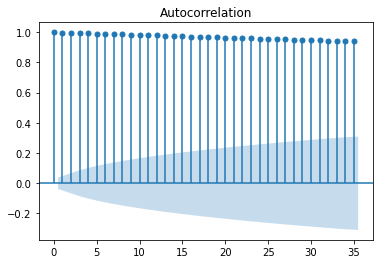

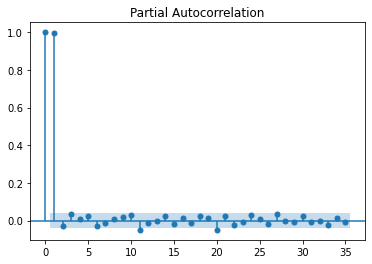

In [4]:
print('Coca Cola :')
sm.graphics.tsa.plot_acf(df['Coca Cola']);
sm.graphics.tsa.plot_pacf(df['Coca Cola']);

Credit Suisse :


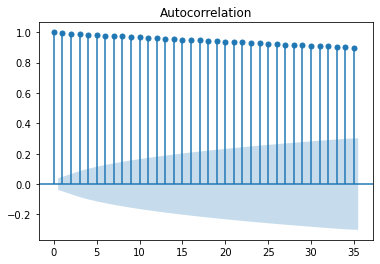

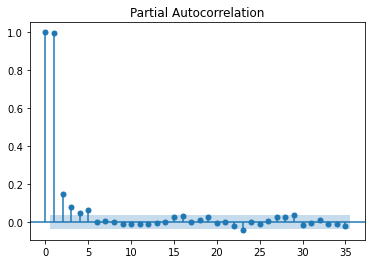

In [5]:
print('Credit Suisse :')
sm.graphics.tsa.plot_acf(df['Credit Suisse']);
sm.graphics.tsa.plot_pacf(df['Credit Suisse']);

Coca Cola :


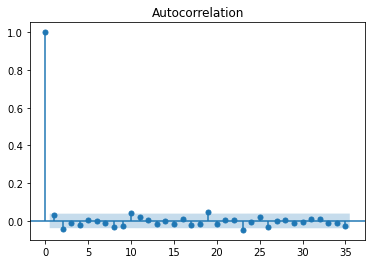

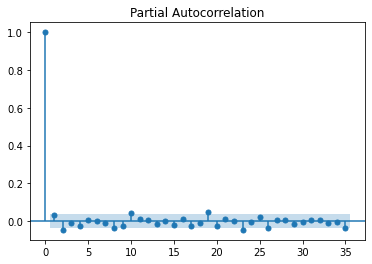

In [6]:
print('Coca Cola :')
sm.graphics.tsa.plot_acf(LR['Coca Cola']);
sm.graphics.tsa.plot_pacf(LR['Coca Cola']);

Credit Suisse :


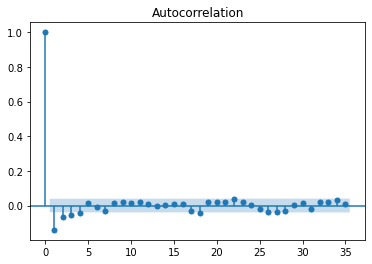

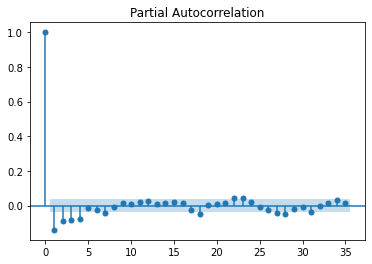

In [7]:
print('Credit Suisse :')
sm.graphics.tsa.plot_acf(LR['Credit Suisse']);
sm.graphics.tsa.plot_pacf(LR['Credit Suisse']);

In [8]:
acorr_ljungbox(LR['Coca Cola'].values, lags= 20, return_df = True)

,lb_stat,lb_pvalue
1,2.467339,0.116235
2,7.557230,0.022854
3,7.831999,0.049614
4,9.119977,0.058170
5,9.223100,0.100490
6,9.226487,0.161236
7,9.585704,0.213292
8,12.680771,0.123316
9,14.449347,0.107215
10,19.576752,0.033520


In [9]:
acorr_ljungbox(LR['Credit Suisse'].values, lags= 20, return_df = True)

,lb_stat,lb_pvalue
1,51.673444,6.554329e-13
2,62.816632,2.288452e-14
3,71.287939,2.261713e-15
4,76.738457,8.543045e-16
5,77.347507,3.009010e-15
6,77.563644,1.137319e-14
7,79.825154,1.495354e-14
8,80.200902,4.454173e-14
9,81.375094,8.612304e-14
10,81.741783,2.285425e-13


In [10]:
variables = np.column_stack((LR['Credit Suisse'].values[3:-1], LR['Credit Suisse'].values[2:-2], LR['Credit Suisse'].values[1:-3], LR['Credit Suisse'].values[:-4]))
x = sm.add_constant(variables)
y = LR['Credit Suisse'].values[4:]

reg1 = sm.OLS(endog = y, exog = x, missing = 'drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     26.43
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.64e-21
Time:                        13:55:14   Log-Likelihood:                 7253.0
No. Observations:                2604   AIC:                        -1.450e+04
Df Residuals:                    2599   BIC:                        -1.447e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -1.491      0.1

Credit Suisse :


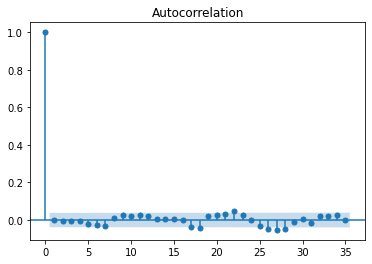

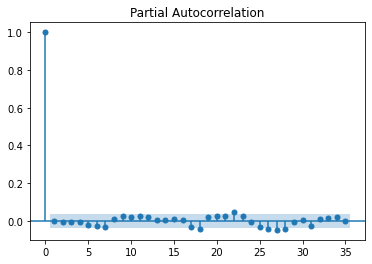

In [11]:
print('Credit Suisse :')
sm.graphics.tsa.plot_acf(results.resid);
sm.graphics.tsa.plot_pacf(results.resid);

In [12]:
acorr_ljungbox(results.resid, lags= 20, return_df = True)

,lb_stat,lb_pvalue
1,0.002210,0.962504
2,0.032540,0.983861
3,0.150790,0.985113
4,0.306043,0.989421
5,1.560320,0.906006
6,3.308712,0.769221
7,6.052393,0.533645
8,6.495083,0.591953
9,8.404116,0.493989
10,9.522430,0.483341
